# 参数估计

## 点估计
### （一） 矩法

根据大数定理，当样本容量$n\rightarrow+\infty$时，样本矩依概率收敛于相应的总体矩，即

$$
A_k\stackrel P\longrightarrow \mu_k,	B_k\stackrel{P}\longrightarrow \nu_k
$$

我们将待估参数$\theta_m$​写成这些总体矩的函数,有几个待估参数总体矩数量$k$就用多少

$$ {equation}
\theta_m=h_m(\mu_1,\mu_2,\ldots,\mu_k)
$$

根据矩法思想，用样本矩代替总体矩

$$
\hat \theta_m=h_m(A_1,A_2,\ldots,A_k)
$$

将$\hat \theta_m$称为参数$\theta_m$的矩估计量



矩估计需要我们提前知道总体的分布形式，然后根据总体的矩来估计参数，这样的方法在实际中很少用到，因为我们很少知道总体的分布形式。




### （二）极大似然法

若事件A发生的概率依赖于待估参数$\theta$,且观察到A事件已经发生，则用使事件A发生的概率达到最大的$\theta$值作为$\theta$的估计。

对于离散总体，设其概率分布为$P\{X=x\}=p(x;\theta)$, $\theta \in \Theta$, $\Theta$是参数空间,则样本$X_1,X_2,\ldots ,X_n$取到$x_1,x_2,\ldots ,x_n$的概率为$\prod\limits_{i=1}^nP\{X_i=x_i\}=\prod\limits_{i=1}^np(x_i;\theta)$

记

$$
L(\theta)=\prod\limits_{i=1}^nP\{X_i=x_i\}=\prod\limits_{i=1}^np(x_i;\theta)
$$

常用微分法（乘法变加法）

$$
l(\theta)=lnL(\theta)=\sum\limits_{i=1}^{n}lnp(x_i;\theta)
$$

有

$$
\frac{dl(\theta)}{d\theta}\bigg|_{\theta=\hat \theta}=0
$$




例子:一组X满足正态分布，通过极大似然法估计$\mu$和$\sigma^2$

$$
\begin{align*}
 &L = \Pi_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp (-\frac{(X_i-\mu)^2)}{2\sigma^2}) \\
 &\ln L = -\frac{n}{2}\ln{2\pi} - \frac{n}{2}\ln (\sigma^2) - \sum_{i=1}^{n}\frac{(x_i-\mu)^2}{2\sigma^2} \\
 &\frac{\partial \ln L}{\partial \mu}= \sum_{i=1}^{n}\frac{(x_i-\mu)}{\sigma^2}=0 \\
 &\frac{\partial \ln L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \sum_{i=1}^{n}\frac{(x_i-\mu)^2}{2\sigma^4} =0 \\
 &\hat\mu = \sum_{i=1}^{n} x_i/n = \bar{x} \\
 &\hat{\sigma^2} = \sum_{i=1}^{n} (x-\bar{x})^2/n 
\end{align*}
$$

样本平均值和标准差 5.020381608445062 2.821661372164499
极大似然法数值解 [5.02038174 2.82166158]
mu的标准差区间，极大似然法  [4.38931276 5.65145046]
mu的平均值+-误差  4.3730480940157275 5.667715122874396


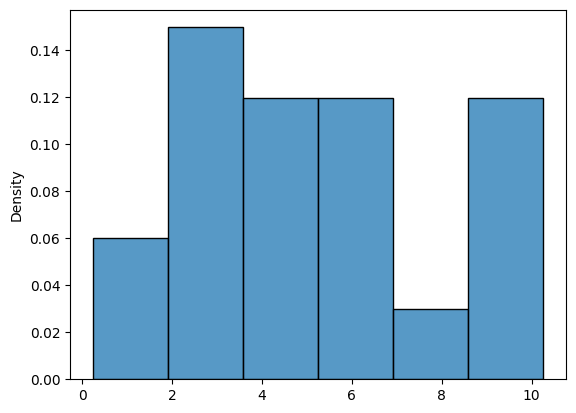

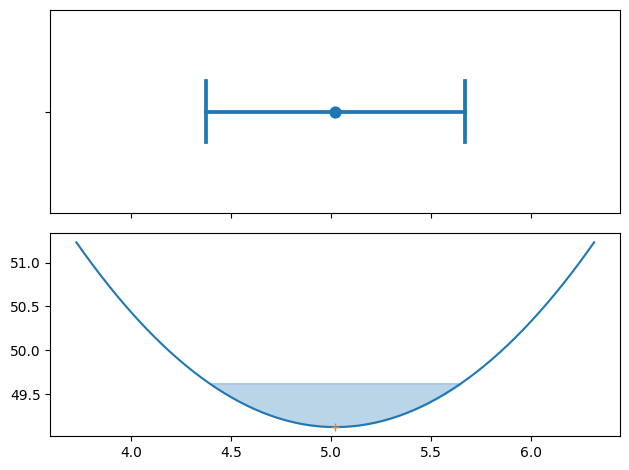

In [ ]:
##通过极大似然法对正态分布的平均值和方差进行估计
import scipy.optimize as opt
import scipy.special as sp
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
###lnL=Sum(lnN())
def log_likelihood(p):
    return -np.log(st.norm.pdf(narr,p[0],p[1])).sum()

###定义正态分布的参数和pdf，随机产生20个事件
mu=5
sigma=3
rv=st.norm(mu,sigma)
narr=rv.rvs(20)

sns.histplot(narr,stat='density') # 20个事件的分布
plt.title('Sample Distribution (Normal)')
print("样本平均值和标准差",np.mean(narr),np.std(narr)) #样本的平均值和标准差,注意，标准差未加ddof=1选项

# 对20个事件的样本构建最大似然函数的负数，并求解最小值
res = opt.minimize(
    log_likelihood, #求解最小值的函数
    x0=(mu,sigma)) #未知参数的初始值
print("极大似然法数值解",res.x)

# 图形比较两种方法的结果
fig,ax = plt.subplots(2,sharex=True)
sns.pointplot(x=narr,capsize=0.3,errorbar='se',ax=ax[0]) #样本平均值和它的误差
ax[0].set_title('Sample Mean and Standard Error')

###对mu可能的数值进行扫描，每个值对应的-lnL
mubins=np.linspace(np.mean(narr)-2*st.sem(narr),np.mean(narr)+2*st.sem(narr),200) #sem为平均值的标准差
xdim=list(log_likelihood([i,res.x[1]]) for i in mubins) #计算-lnL,mu扫描，sigma不变，为数值求解值
ax[1].plot(mubins,xdim) #每个mu值对应的-lnL
###-最大似然值
mll=log_likelihood([res.x[0],res.x[1]])
ax[1].plot(res.x[0],mll,"+")
### -lnL - 最小值=0.5 => mu的标准差
ax[1].fill_between(mubins,xdim,mll+0.5,where=((xdim-mll-0.5)<0.01),color='C0',alpha=0.3)
plt.tight_layout()
### 最大似然法得到的mu的标准差区间
print("mu的标准差区间，极大似然法 ",mubins[np.where(abs(xdim-mll-0.5) < 0.01)])
### 平均值和误差
print("mu的平均值+-误差 ",np.mean(narr)-st.sem(narr),np.mean(narr)+st.sem(narr))
### 样本的标准差不等于平均值的标准差

例子：指数分布
极大似然法估计参数$\lambda$

$$
\begin{align}
& L =\Pi_{i=1}^{n}(\lambda e^{-\lambda x_i})\\
&\ln L=n\ln \lambda - \lambda \sum x_i\\
& \frac{\partial \ln L}{\partial \lambda} = \frac{n}{\lambda} - \sum x_i\\
&\hat\lambda=\frac{n}{\sum x_i} = \frac{1}{\bar{x}}
\end{align}
$$

可以发现似然函数不是对称的了


样本平均值和标准差 7.475748791266109 8.322249531523443
极大似然法数值解 [7.4757509]
mu的标准差区间，极大似然法  [6.03564637 9.43952482]
mu的平均值+-误差  5.614837223445889 9.336660359086329


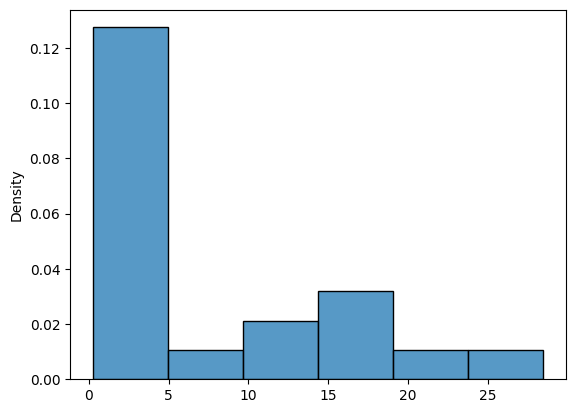

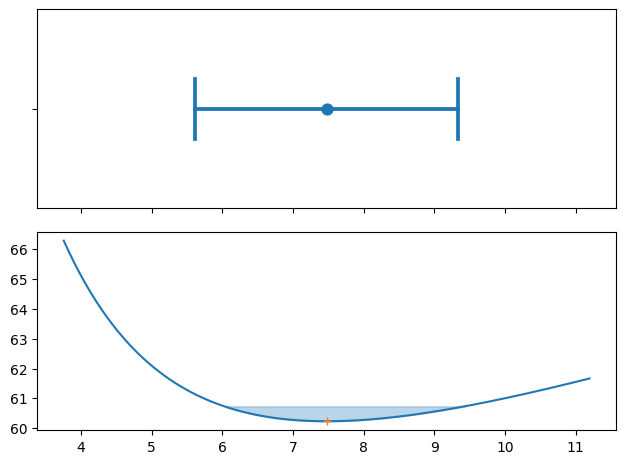

In [ ]:
import scipy.optimize as opt
import scipy.special as sp

def log_likelihood(p):
    return -np.log(st.expon.pdf(xarr,0,p)).sum()
    
mu=5
rv=st.expon(0,mu) #注意这里的mu为1/lambda
xarr=rv.rvs(20)

sns.histplot(xarr,stat='density')
plt.title('Sample Distribution (Exponential)')

fig,ax = plt.subplots(2,sharex=True)
fig.suptitle('Maximum Likelihood Estimation for Exponential Distribution')

print("样本平均值和标准差",np.mean(xarr),np.std(xarr,ddof=1))

res = opt.minimize(
    log_likelihood,
    x0=(mu))

mubins=np.linspace(np.mean(xarr)-2*st.sem(xarr),np.mean(xarr)+2*st.sem(xarr),200)

sigmabins=np.linspace(0,6,100)
xdim=list(log_likelihood(i) for i in mubins)
mll=log_likelihood(res.x[0])
ax[1].plot(mubins,xdim)
ax[1].plot(res.x[0],mll,"+")
print("极大似然法数值解",res.x)
plt.tight_layout()
ax[1].fill_between(mubins,xdim,mll+0.5,where=((xdim-mll-0.5)<0.01),color='C0',alpha=0.3)
sns.pointplot(x=xarr,capsize=0.3,errorbar='se',ax=ax[0])

print("mu的标准差区间，极大似然法 ",mubins[np.where(abs(xdim-mll-0.5) < 0.01)])
print("mu的平均值+-误差 ",np.mean(xarr)-st.sem(xarr),np.mean(xarr)+st.sem(xarr))
#最大似然法求出的区间不对称

例子：平均分布

例：若一组X满足平均分布$(0,
\theta)$，通过极大似然法估计$\theta$

$$
\begin{split}L=
\begin{cases}
1/\theta^{n}, & 0<x<\theta\\
0, & 其他情况
\end{cases}
\end{split}
$$

$\theta$越小，$L$越大。
$\theta$能取的最小值应大于$max(x_1,x_2,\ldots,x_n)$，所以$\hat \theta=max(x_1,x_2,\ldots,x_n)$


True
Max likelihood theta= [4.83932495] 4.839323250286823
Mean value theta= 4.678905620279811


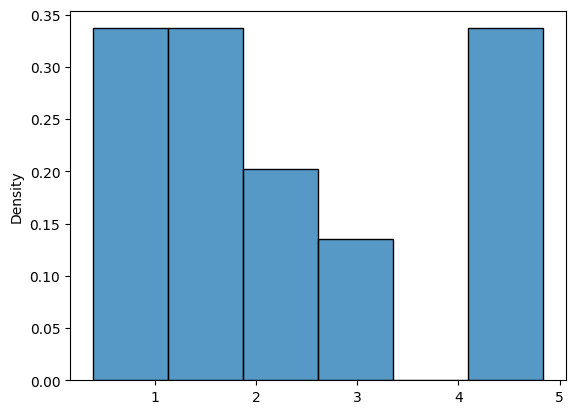

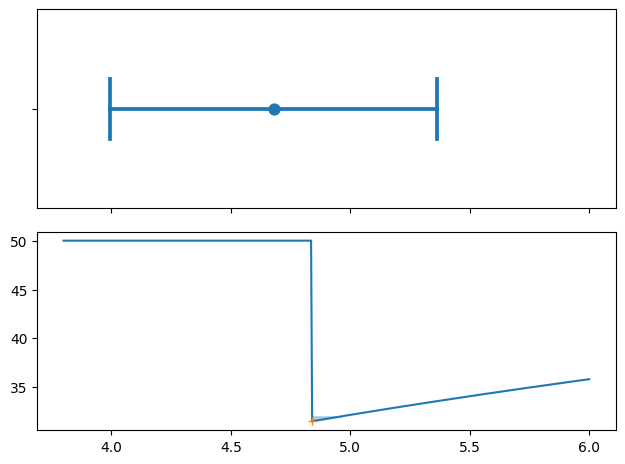

: 

In [ ]:
import scipy.optimize as opt
import scipy.special as sp

def log_likelihood(p):
    y = np.prod(st.uniform.pdf(xarr,0,p))
    if(y != 0):
        return -np.log(y)
    else:
        return 50
    
mu=5
rv=st.uniform(0,mu)
xarr=rv.rvs(20)


sns.histplot(xarr,stat='density')
plt.title('Sample Distribution (Uniform)')

fig,ax = plt.subplots(2,sharex=True)
fig.suptitle('Maximum Likelihood Estimation for Uniform Distribution')

res=opt.minimize(
    log_likelihood,
    x0=(mu),
    method='nelder-mead'
)
print(res.success)

mubins=np.linspace(3.8,6,500)

xdim=list(log_likelihood(i) for i in mubins)
mll=log_likelihood(res.x[0])
ax[1].plot(mubins,xdim)
ax[1].plot(res.x[0],mll,"+")


plt.tight_layout()
ax[1].fill_between(mubins,xdim,mll+0.5,where=((xdim-mll-0.5)<0.01),color='C0',alpha=0.3)
sns.pointplot(x=2*xarr,capsize=0.3,errorbar='se',ax=ax[0]) #矩估计法，x平均值=mu/2
print("Max likelihood theta=",res.x, np.max(xarr))
print("Mean value theta=",2*np.mean(xarr)) 

## 区间估计

设总体为$X$,$\theta \in \Theta$是待估参数，$X_1,X_2,\ldots ,X_n$是来自总体X的样本，统计量$\hat \theta_L(X_1,X_2,\ldots ,X_n), \hat \theta_R(X_1,X_2,\ldots ,X_n)$满足$\hat \theta_L < \hat \theta_R$, 且对于给定的$\alpha$，对于任意的$\theta \in \Theta$​, 有

$$
P\{\hat \theta_L < \theta < \hat\theta_R\}\ge 1-\alpha
$$

则称区间$(\hat \theta_L , \hat \theta_R)$是参数$\theta$置信水平为$1-\alpha$的置信区间。


真实的$\theta$落在$\hat\theta_1(X) \leq \theta \leq  \hat\theta_2(X)$的概率

$$
P_\theta (\hat\theta_1(X) \leq \theta \leq  \hat\theta_2(X))
$$

### 枢轴量

总体$X$的密度函数为$f(x;\theta)$，其中$\theta$是待估参数，如果样本和参数的函数$G(X_1,X_2,\ldots ,X_n,\theta)$的分布完全已知，且不依赖与其他参数，则称$G(X_1,X_2,\ldots ,X_n,\theta)$为枢轴量

### 寻求区间估计的步骤

1. 构造一个枢轴量$G(X_1,X_2,\ldots ,X_n,\theta)$​

2. 对给定的置信水平$1-\alpha$，根据枢轴量$G(X_1,X_2,\ldots ,X_n,\theta)$的分布，选择两常数$a$和$b$,使

   $$
   P_\theta\{a<G(X_1,X_2,\ldots ,X_n,\theta)<b\}=1-\alpha
   $$
   
   若对离散随机变量，可能没有办法使概率正好等于$1-\alpha$,因此，$a$和$b$应使$P_\theta\{a<G(X_1,X_2,\ldots ,X_n,\theta)<b\}\ge1-\alpha$且尽可能接近$1-\alpha$
   
3. 根据分布，取出尽可能小的区间$(a,b)$，并据此解出$\hat \theta_L, \hat \theta_R$

习惯上，取$a$和$b$满足

$$
P_\theta\{G(X_1,X_2,\ldots ,X_n,\theta)\le a\}=P_\theta\{G(X_1,X_2,\ldots ,X_n,\theta)\ge b\}=\frac{\alpha}{2}
$$

### 枢轴量的选择原则

1. 包含未知参数、未知参数的样本估计、和一个已知参数（有总体参数用总体参数，没有的话用样本量）

2. 分布函数要已知


### 单总体 $N\left(\mu, \sigma^2\right)$ 常用枢轴量

(1) $\sigma^2$ 已知, 求 $\mu$ 的区间估计: $G=\frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim N(0,1)$

(2) $\sigma^2$ 未知, 求 $\mu$ 的区间估计: $\frac{\bar{X}-\mu}{S / \sqrt{n}} \sim t(n-1)$

(3) $\mu$ 未知, 求 $\sigma^2$ 的区间估计: $\frac{(n-1) S^2}{\sigma^2}=\sum_{i=1}^n\left(\frac{X_i-\bar{X}}{\sigma}\right)^2 \sim \chi^2(n-1)$

*(4) $\mu$ 已知, 求 $\sigma^2$ 的区间估计: $\sum_{i=1}^n\left(\frac{X_i-\mu}{\sigma}\right)^2 \sim \chi^2(n)$



[1.21024386 0.87149234]


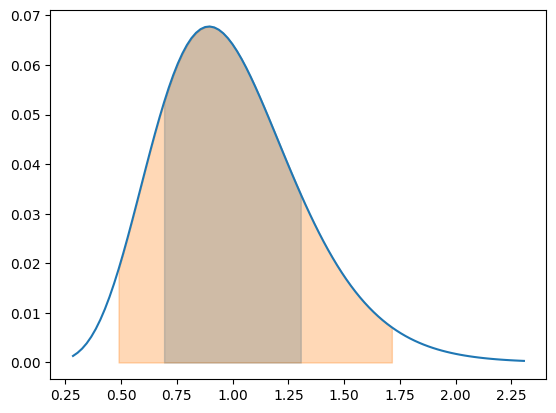

In [2]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
## chi2函数
ndf=19
rv=st.chi2(ndf)
x=np.linspace(rv.ppf(0.001),rv.ppf(0.999),100)
plt.plot(x/ndf,rv.pdf(x))
plt.fill_between(x/ndf,rv.pdf(x),where=(x>rv.interval(0.68)[0])&(x<rv.interval(0.68)[1]),color='C0',alpha=0.3)
plt.fill_between(x/ndf,rv.pdf(x),where=(x>rv.interval(0.95)[0])&(x<rv.interval(0.95)[1]),color='C1',alpha=0.3)
print(1/np.sqrt(np.array(rv.interval(0.68))/ndf))

### 双总体的常用枢轴量

(1) $\sigma_1^2, \sigma_2^2$ 己知, 求 $\mu_1-\mu_2$ 的区间估计: $\frac{(\bar{X}-\bar{Y})-\left(\mu_1-\mu_2\right)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} \sim N(0,1)$

(2) $\sigma_1^2=\sigma_2^2$ 未知, 求 $\mu_1-\mu_2$的区间估计:

$$
\frac{(\bar{X}-\bar{Y})-\left(\mu_1-\mu_2\right)}{S_{w}\sqrt{{\frac{1}{n_1}+\frac{1}{n_2}}}} \sim t\left(n_1+n_2-2\right)
$$

$$
S_w^2 = \frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}
$$

(3) $\mu_1, \mu_2$ 未知, 求 $\frac{\sigma_1^2}{\sigma_2^2}$ 的区间估计: 

$$
\frac{S_1^2}{S_2^2} / \frac{\sigma_1^2}{\sigma_2^2} \sim F\left(n_1-1, n_2-1\right)
$$

(4) $\mu_1, \mu_2$ 已知, 求 $\frac{\sigma_1^2}{\sigma_2^2}$ 的区间估计: 

$$
\frac{\sum_{m=1}^n\left(X_1-\mu_1\right)^2 / n_1}{\sum_{i=1}^2\left(Y_1-\mu_2\right)^2 / n_2} / \frac{\sigma_1^2}{\sigma_2^2} \sim F\left(n_1, n_2\right)
$$

(5) $S_x^2+S_y^2$

$$
(n-1)S^2_x/\sigma^2 \propto \chi_{n-1}^2\ ,(m-1)S^2_y/\sigma^2 \propto \chi_{m-1}^2
$$

$$
(n-1)S^2_x/\sigma^2 + (m-1)S^2_y/\sigma^2 = (\sum_{i=1}^{n} (x_i-\bar{x})^2+\sum_{i=1}^{m} (y_i-\bar{y})^2)/\sigma^2 \propto \chi_{n-1+m-1}^2
$$


1.1538461538461537


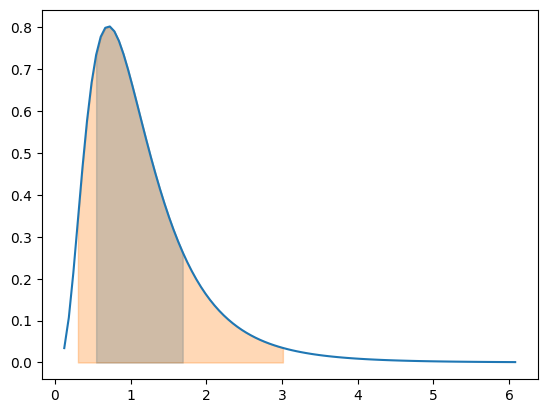

In [5]:
ndf=10
rv=st.f(ndf,ndf+5)
x=np.linspace(rv.ppf(0.001),rv.ppf(0.999),100)
plt.plot(x,rv.pdf(x))
plt.fill_between(x,rv.pdf(x),where=(x>rv.interval(0.68)[0])&(x<rv.interval(0.68)[1]),color='C0',alpha=0.3)
plt.fill_between(x,rv.pdf(x),where=(x>rv.interval(0.95)[0])&(x<rv.interval(0.95)[1]),color='C1',alpha=0.3)
print(rv.mean())

### 指数分布参数估计

#### 中心极限

$$
\frac{(\bar{x}-\mu)}{\sigma/\sqrt{n}}=\frac{(\bar{x}-1/\lambda)}{(1/\lambda)/\sqrt{n}} \propto N(0,1)
$$

$$
\lambda\bar{x} \propto  N(0,1)/\sqrt{n}+1
$$

因为中心极限定理，所以自由度低的时候，估计不准确

估计指数分布，自由度最好大一点


#### 卡方

因为指数分布的函数是$f(x)=\lambda e^{-\lambda x}$

令$2\lambda x = y$,则y的概率密度函数

$$
g(y) = e^{-y/2}/2
$$

$\chi^2$分布

$$
k_n(x) = \frac{1}{\Gamma(\frac{n}{2})2^{\frac{n}{2}}}e^{-x/2}x^{(n-2)/2}
$$

当$n=2$,$k_2 = e^{-x/2}/2$

所以，$2n\lambda\bar{x}\propto \chi_{2n}^2$

抽取重复实验多次，在产生的估计中再求68%置信区间

<ErrorbarContainer object of 3 artists>

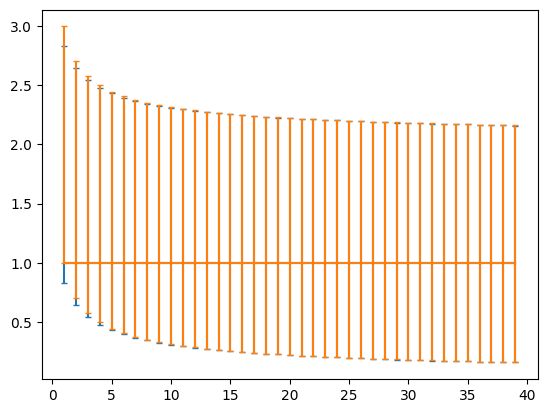

In [3]:
# 对比大数定律和卡方分布在不同自由度下进行估计
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

## 用chi2分布
yerr_chi2=[]
## 用中心极限定理
yerr_norm=[]
dim=40
for n in range(1,dim):
    edge=np.array(st.chi2.interval(0.68,2*n))/2/n
    yerr_chi2.append(edge)
    edge_n=np.array(st.norm.interval(0.68))/np.sqrt(n)+1
    yerr_norm.append(edge_n)
plt.errorbar(x=range(1,dim),yerr=(np.array(yerr_chi2)).T,y=np.ones(dim-1),capsize=2)
plt.errorbar(x=range(1,dim),yerr=(np.array(yerr_norm)).T,y=np.ones(dim-1),capsize=2)

5.0275039363915885 4.871251335467369
[5.02750401]
chi2   [ 1.42358668 -0.90775956] 
norm   [ 1.43763765 -0.91458065]
MLE  [-0.96902725  1.30417953  1.31875137]
Moments  1.089244912159167


<ErrorbarContainer object of 3 artists>

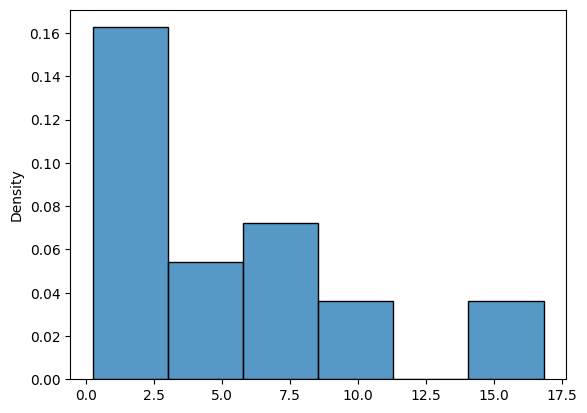

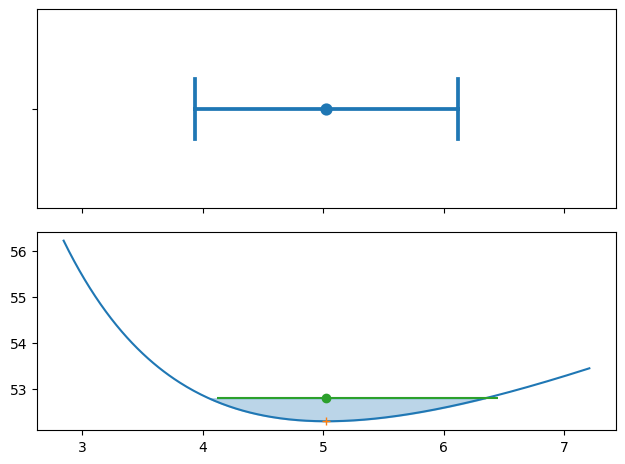

In [4]:
# 对比极大似然法与估计法的差别
import scipy.optimize as opt
import scipy.special as sp
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def log_likelihood(p):
    return -np.log(st.expon.pdf(xarr,0,p)).sum()
    
mu=5
rv=st.expon(0,mu)
n=20
xarr=rv.rvs(n)

sns.histplot(xarr,stat='density')

fig,ax = plt.subplots(2,sharex=True)

print(np.mean(xarr),np.std(xarr,ddof=1))

res = opt.minimize(
    log_likelihood,
    x0=(mu))

mubins=np.linspace(np.mean(xarr)-2*st.sem(xarr),np.mean(xarr)+2*st.sem(xarr),300)

xdim=list(log_likelihood(i) for i in mubins)
mll=log_likelihood(res.x[0])
ax[1].plot(mubins,xdim)
ax[1].plot(res.x[0],mll,"+")
print(res.x)
plt.tight_layout()
ax[1].fill_between(mubins,xdim,mll+0.5,where=((xdim-mll-0.5)<0.01),color='C0',alpha=0.3)
sns.pointplot(x=xarr,capsize=0.3,errorbar='se',ax=ax[0])
### chi2 method
err=np.mean(xarr)/(np.array(st.chi2.interval(0.68,2*n))/2/n)-np.mean(xarr)
### norm method
err_norm=np.mean(xarr)/(np.array(st.norm.interval(0.68))/np.sqrt(n)+1)-np.mean(xarr)
print("chi2  ",err,"\nnorm  ",err_norm)
print("MLE ", mubins[np.where(abs(xdim-mll-0.5) < 0.01)]-np.mean(xarr))
print("Moments ",st.sem(xarr))
xerr_l=-err[1]
xerr_h=err[0]
ax[1].errorbar(x=np.mean(xarr),y=mll+0.5,fmt='o',xerr=[[xerr_l],[xerr_h]])

## 评价准则

### （一）无偏性原则

$$
E(\hat \theta)=\theta  
$$

- $\hat \theta$是$\theta$的无偏估计
- 极大似然估计不一定是无偏估计
- 不知道pdf的时候，可以先求cdf再求导

若 $E(\hat{\theta}) \neq \theta$，则称 $E(\hat{\theta}) - \theta$ 为估计量 $\hat{\theta}$ 的偏差。

若 $E(\hat{\theta}) \neq \theta$，但满足 $\mathop{\lim}_{n \to +\infty} E(\hat{\theta}) = \theta$，则称 $\hat{\theta}$ 是 $\theta$ 的渐近无偏估计（asymptotic unbiased estimation）。



### （二）有效性原则

​	若$\hat\theta_1, \hat \theta_2$都是无偏估计，且$\forall \theta \in \Theta, Var_\theta(\hat \theta_1)<=Var_\theta(\hat \theta_2)$,要求至少有一个$\theta$使不等号成立，则称$\hat \theta_1$比$\hat \theta_2$更有效。

### （三）均方误差原则

要使

$$
Mse(\theta,\hat \theta)=E[(\hat \theta -\theta)^2]
$$

尽量小


最小方差无偏估计 | MVU

### （四）相合性原则

满足


$$
\hat \theta\stackrel{P}\longrightarrow\theta
$$

均匀分布的MVU

- 若 $ x $ 符合 $(0, \theta)$ 的均匀分布，两种估计：
  1. 矩估计，$\theta_1 = 2 \bar{x}$
  2. 最大似然，$\theta_2 = \frac{n+1}{n} \max(x_1, \ldots, x_n)$

- 各自的 $ M(\theta) $ 为：
  1. 矩估计，$\frac{\theta^2}{3n}$
  2. 最大似然，$\frac{1}{n(n+2)} \theta^2$